# Analysing Marketing Campaigns with Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Configuration for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-whitegrid')


# Chapter 2: Exploratory Analysis & Summary Statistics

In [3]:
dfdc = pd.read_csv('C:/Users/UserPC/.conda/3rd Python/Datacamp learning/marketing_new.csv')

# Data loaded successfully print successful statement
if dfdc.empty:
    print("Data loading failed.")
else:
    # Check for missing values
    # missing_values = df.isnull().sum()
    # if missing_values.any():
    #    print("Missing values found in the dataset:")
    #    print(missing_values[missing_values > 0])
    #else:
#print("No missing values found in the dataset.")
    print("Data loaded successfully.")




Data loaded successfully.


In [4]:
marketing = dfdc.copy()

# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']== True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers / total
print(round(conversion_rate*100, 2), "%")

14.09 %


In [5]:
marketing1 = dfdc.copy()

# Calculate the number of subscribers
total_subscribers = marketing1[marketing1['converted']== True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing1[marketing1['is_retained']== True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers

print("total subscribers:", total_subscribers)
print("retained:", retained)
print(round(retention_rate*100, 2), "%")



total subscribers: 1030
retained: 6967
676.41 %


- Retention Rate: This measures the percentage of users who remain subscribed after a certain period. To calculate it, you:

- 1. Count the number of subscribers using the user_id and converted columns.
- 2. Count the number of retained subscribers using the is_retained column.
- 3. Divide the number of retained subscribers by the total number of initial subscribers.

These metrics are crucial for understanding both immediate and long-term campaign effectiveness.

The goal of the next lesson is to explore how to use customer segmentation to improve marketing strategies by analyzing different customer groups and their responses.

In [6]:
marketing1



,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0,4.0,Yes
10033,10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10034,10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10035,10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaN,Email,True,2.0,4.0,Yes


In [7]:
# Native version

# Isolate English speakers
english_speakers = marketing1[marketing1['language_displayed'] == 'English']

# Calculate the total number of English speakers
total = english_speakers['user_id'].nunique() 

# Calculate the number of English speakers who converted
converted = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = converted / total

print("The conversion rate for English speakers is", round(conversion_rate * 100, 2), '%')




The conversion rate for English speakers is 13.13 %


In [8]:
# Datacamp version
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 13.13 %


## Language Conversion Rate

In [9]:
# Group by language_displayed and count unique users
total = marketing1.groupby('language_displayed').nunique()['user_id']

# Group by language_displayed and count unique conversions
subscribers = marketing1[marketing1['converted'] == True].groupby('language_displayed').nunique()['user_id']

# Calculate the conversion rate for all languages
language_conversion_rate = round((subscribers/total)*100, 2)
print(language_conversion_rate)

language_displayed
Arabic     50.00
English    13.13
German     71.62
Spanish    20.00
Name: user_id, dtype: float64


In [10]:
# Group by language_displayed and count unique users
total = marketing1.groupby('language_displayed').nunique()['user_id']



total

language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64

In [11]:
subscribers = marketing1[marketing1['converted'] == True].groupby('language_displayed').nunique()['user_id']



subscribers

language_displayed
Arabic      12
English    941
German      53
Spanish     24
Name: user_id, dtype: int64

## Visualising Language Conversion Rate

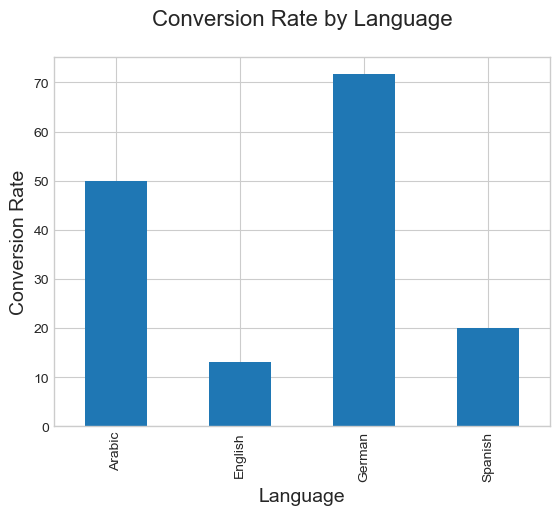

In [12]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion Rate by Language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion Rate', size = 14)

# Display the plot
plt.show()

## Creating daily conversion rate DataFrame


In [13]:
# Group by date_served and count unique users
total = marketing1.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing1[marketing1['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

## Setting up our data to visualize daily conversion


In [14]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                              'conversion_rate']

## Visualize daily conversion rate


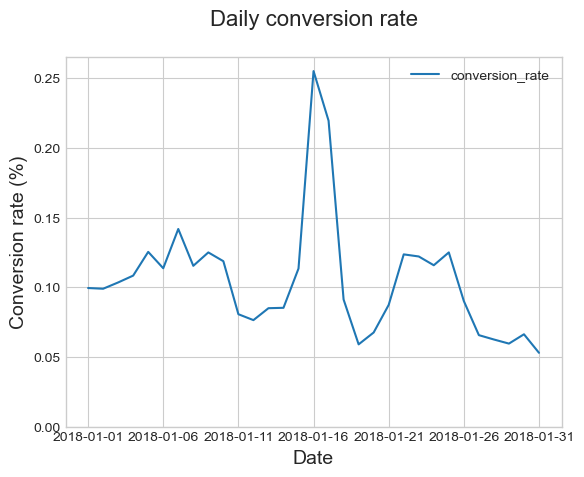

In [15]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

# Plotting Campaign Results

### Marketing channels across age groups


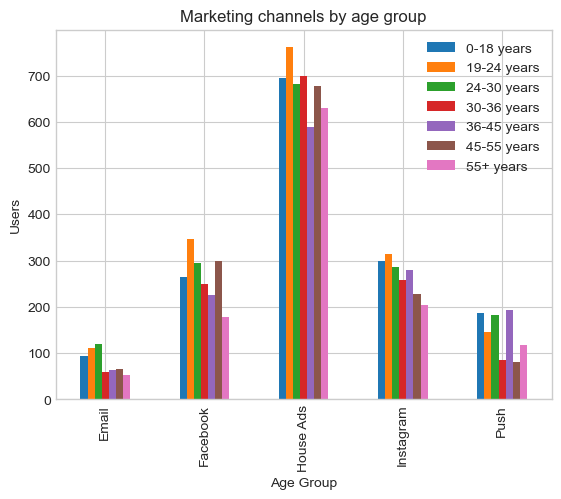

In [16]:
channel_age = marketing1.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

### Grouping and counting by multiple columns


In [17]:
# Count the subs by subscribing channel and day
retention_total = marketing1.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
display(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64

In [18]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing1[marketing1['is_retained'] == True].groupby(['date_subscribed', 
                                       'subscribing_channel'])['user_id'].nunique()

# Print results
display(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64

## Analyzing retention rates for the campaign

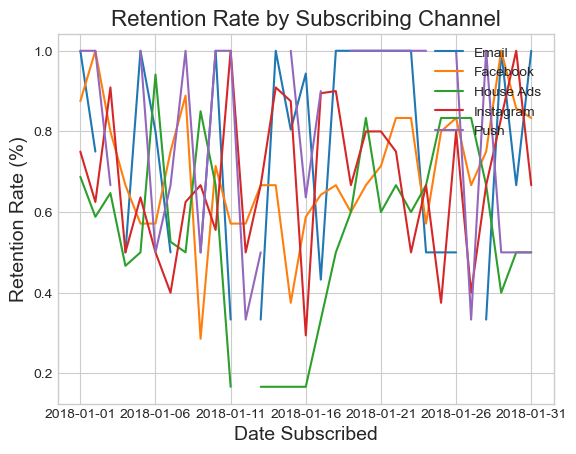

In [19]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel', size = 16)
plt.xlabel('Date Subscribed', size = 14)
plt.ylabel('Retention Rate (%)', size = 14)
plt.legend(loc='upper right', labels=retention_rate_df.columns.values)
plt.show()

# Chapter 3: Conversion Attribution

### Building a conversion function


In [20]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### Test and visualize conversion function


date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


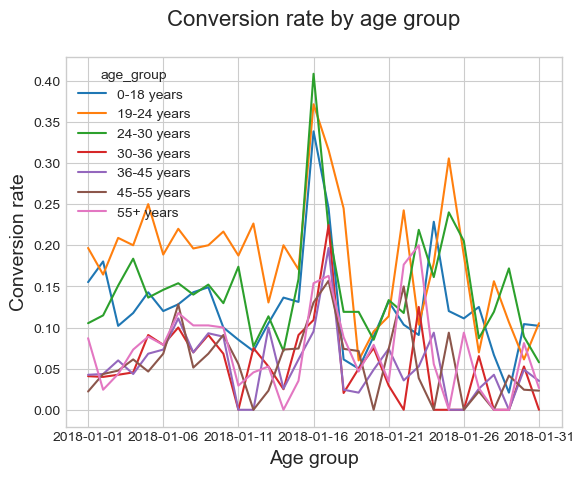

In [21]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing1, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot(kind = 'line')
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

### Plotting Function

In [22]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()  
        plt.clf()

### Putting it all together

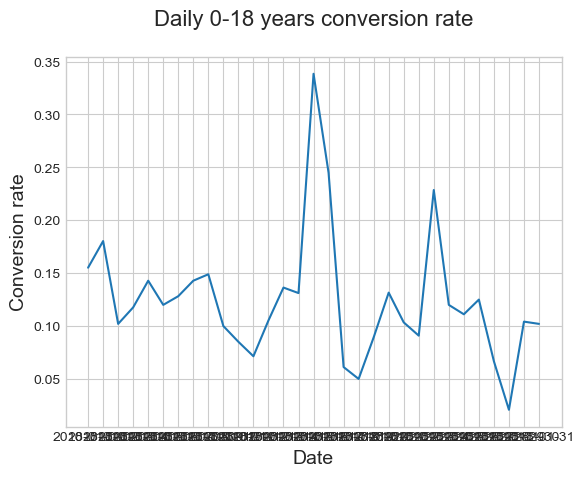

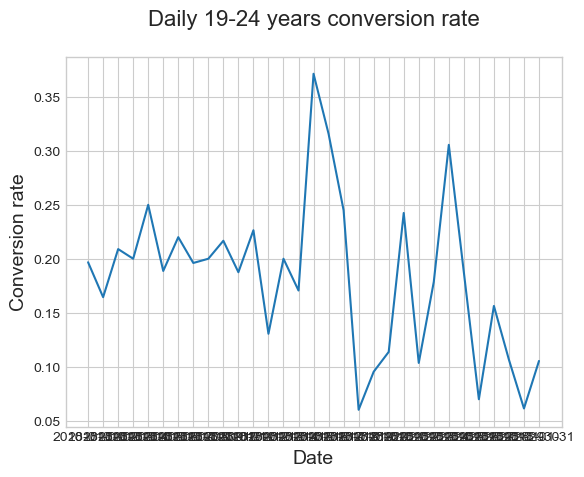

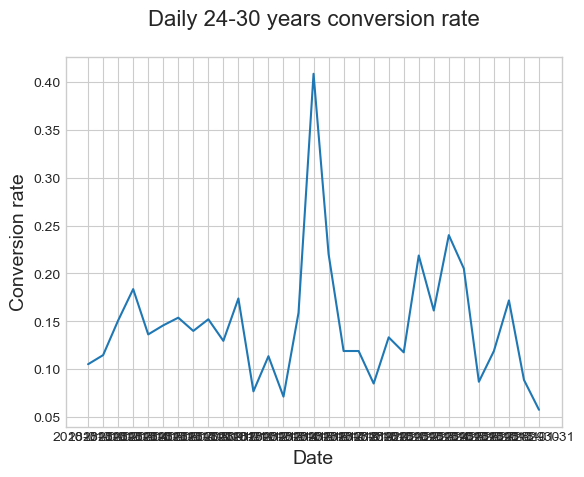

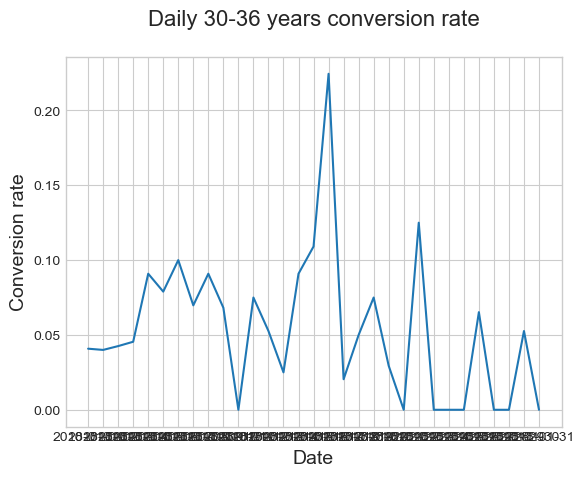

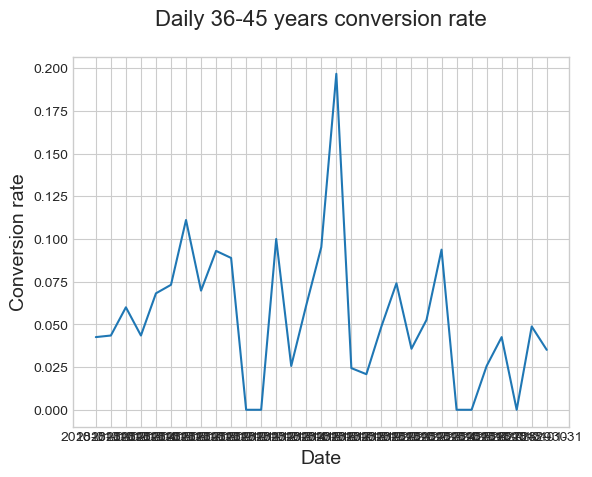

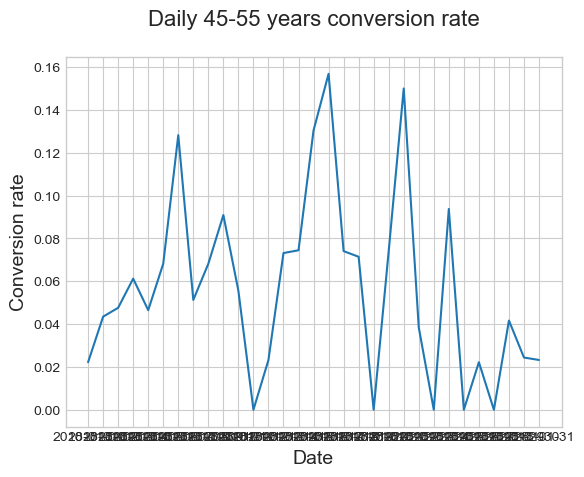

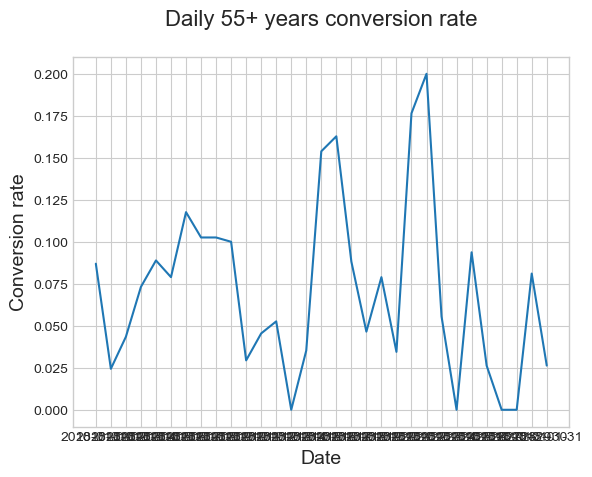

<Figure size 640x480 with 0 Axes>

In [23]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

### House ads conversion rate


In this exercise, you'll try out your ```conversion_rate()``` and ```plotting_conv()``` functions out on marketing looking at conversion rate by ```'date_served'``` and ```'marketing_channel'```.

In [24]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

display(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64

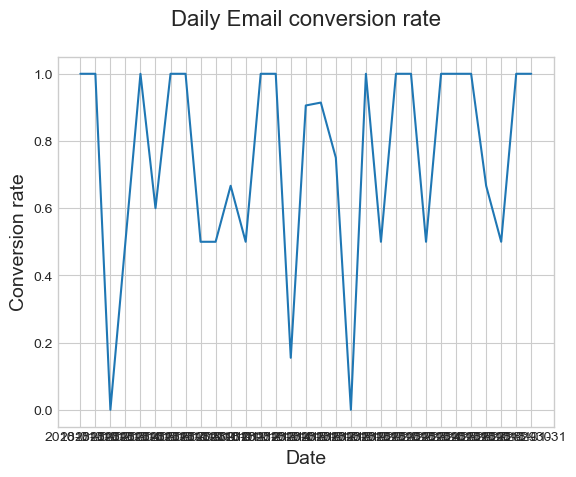

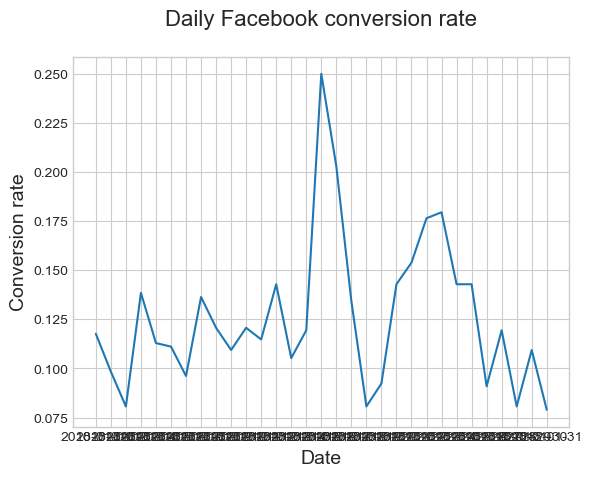

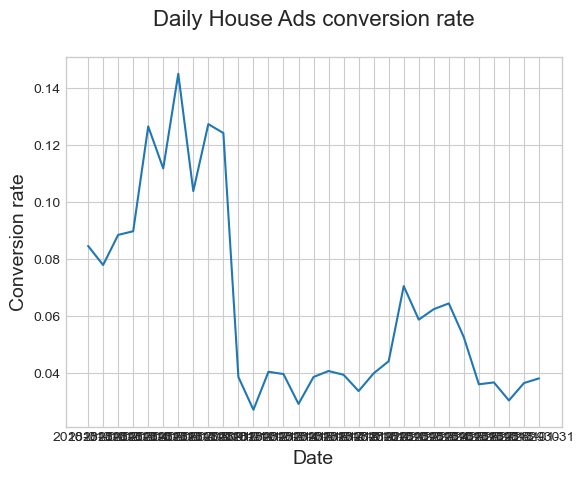

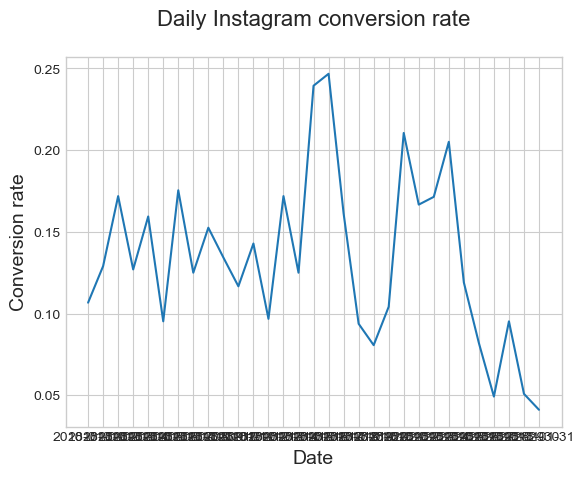

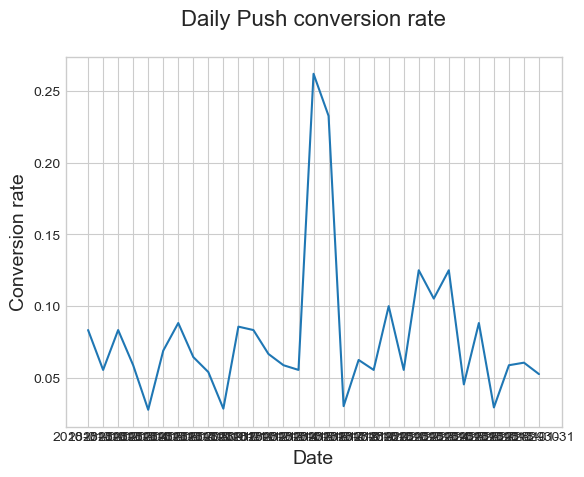

<Figure size 640x480 with 0 Axes>

In [25]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)


Sudden decrease in conversion rate around the middle of the month.

### Analyzing House ads conversion rate


In [27]:
# Convert to datetime first
marketing1['date_served'] = pd.to_datetime(marketing1['date_served'])

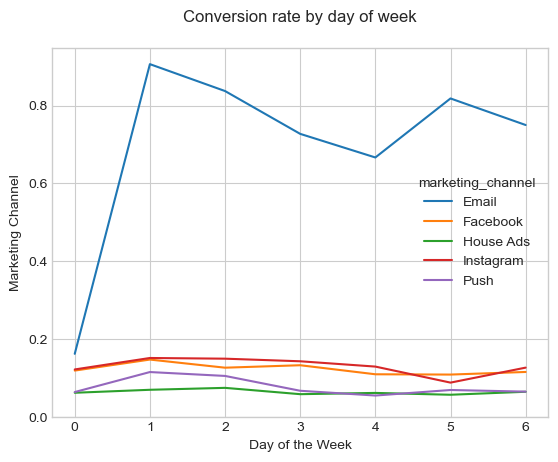

In [28]:
# Add day of week column to marketing
marketing1['DoW_served'] = marketing1['date_served'].dt.dayofweek
# marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing1, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot(kind = 'line')
plt.title('Conversion rate by day of week\n')
plt.xlabel('Day of the Week')
plt.ylabel('Marketing Channel')
plt.ylim(0)

plt.show()


### House ads conversion by language

Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

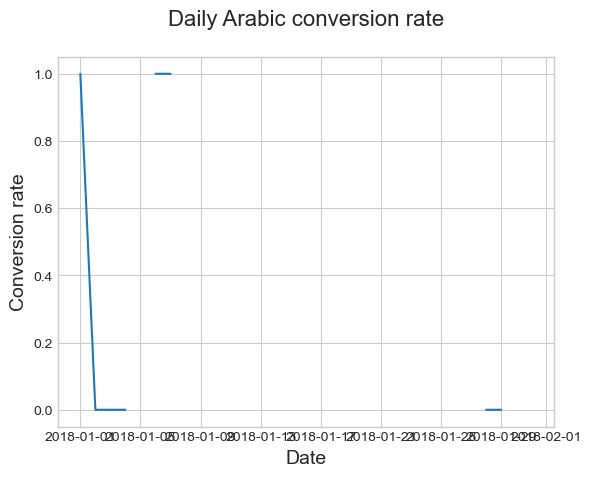

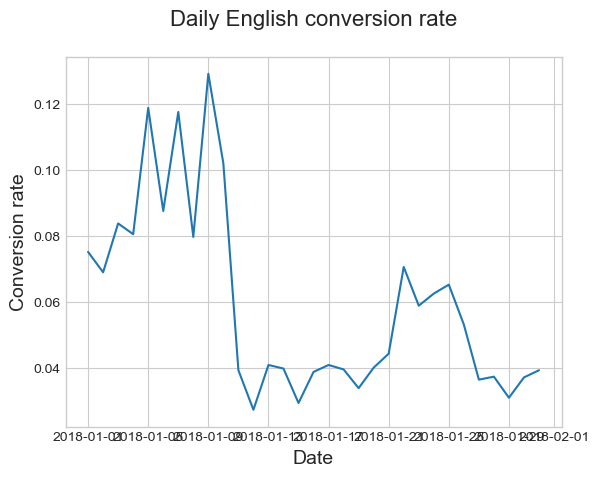

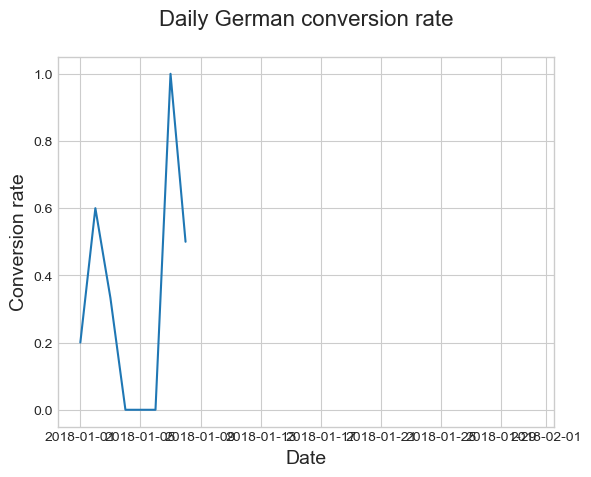

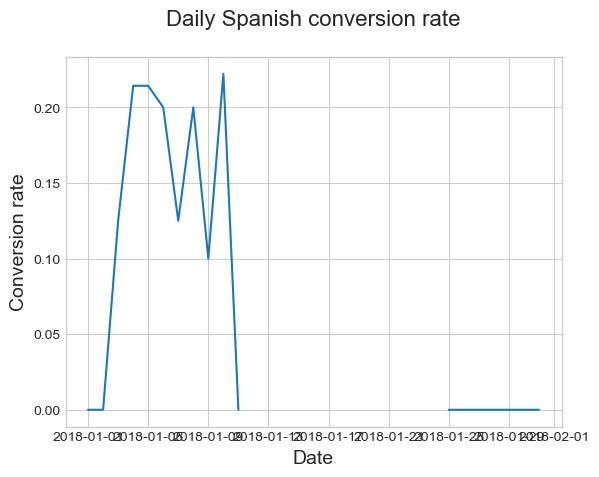

<Figure size 640x480 with 0 Axes>

In [30]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing1[marketing1['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

### Creating a DataFrame for house ads


he house ads team is concerned because they've seen their conversion rate drop suddenly in the past few weeks. In the previous exercises, you confirmed that conversion is down because you noticed a pattern around language preferences.

As a data scientist, it is your job to provide your marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem. It is vital that you not only say "looks like there's a language problem," but instead identify what the problem is specifically so that the team doesn't repeat their mistake.

In [ ]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.____(
    house_ads['____'] == house_ads['____'], 
    '____', 
    '____')

# Groupby date_served and correct_language
language_check = house_ads.____(____)['____'].____()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)